In [1]:
# 1. Fire off notebook
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 2. Check if env var DFDATA exists
dfdata = os.getenv('DFDATA')
dfdata

'/gws/open/NYCOpenData/nycopendata/data'

In [3]:
# 3. Read csv file
data_file = 's7yj-m732/1414245680/s7yj-m732'

# data catolog: https://datahub.cusp.nyu.edu/catalog
df = pd.read_csv(os.path.join(dfdata, data_file))

# 4. Display top rows
df.head()

,TITLE,DESCR,SFX,SFFX DESCR,STD HRS,ASG LVL,JOBCD,UNION CD,UNION DESCR,BARG UNIT,BARG UNIT DESCR,APRL BANK,APRL LVL,MIN RATE,MAX RATE
0,NaN,DESCR,NaN,SFFX DESCR,NaN,NaN,NaN,NaN,UNION DESCR,BARG UNIT,BARG UNIT DESCR,APRL BANK,APRL LVL,NaN,NaN
1,2917.0,PUBLIC RELATION SPEC,0.0,PUBLIC RELATION SPEC,35.0,0.0,11363.0,403.0,UNIQUE TITLES DB OF ED,N/U,Non-Union,Z,00,$36.10,$45.86
2,2917.0,PUBLIC RELATION SPEC,0.0,PUBLIC RELATION SPEC,35.0,0.0,8562.0,772.0,NON COMPETITIVE MANAGER,N/U,Non-Union,H,M1,$47748.00,$61955.00
3,2917.0,PUBLIC RELATION SPEC,0.0,PUBLIC RELATION SPEC,35.0,0.0,8563.0,772.0,NON COMPETITIVE MANAGER,N/U,Non-Union,H,M2,$54767.00,$71066.00
4,2917.0,PUBLIC RELATION SPEC,0.0,PUBLIC RELATION SPEC,35.0,0.0,8564.0,772.0,NON COMPETITIVE MANAGER,N/U,Non-Union,H,M3,$61791.00,$80177.00


In [4]:
# two numerical columns that we will plot against each other
xcol, ycol = 'MIN RATE', 'MAX RATE'

# 5. Remove all but two numerical columns
df = df.drop([
        col for col in df.columns 
        if col not in [xcol, ycol]
], axis=1).dropna(how='any')

# 6. Display reduced dataframe
df.head()

,MIN RATE,MAX RATE
1,$36.10,$45.86
2,$47748.00,$61955.00
3,$54767.00,$71066.00
4,$61791.00,$80177.00
5,$68810.00,$89288.00


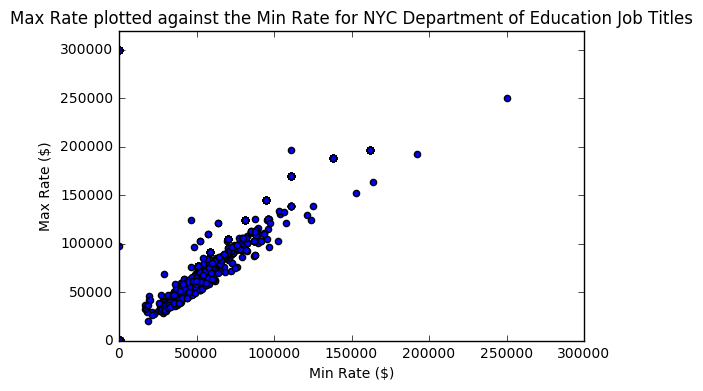

In [5]:
# convert currency values to float
df[xcol] = df[xcol].replace('[\$,]', '', regex=True).astype(float)
df[ycol] = df[ycol].replace('[\$,]', '', regex=True).astype(float)

# 7. Plot the two numerical columns against eachother
df.plot(xcol, ycol, kind='scatter')

plt.title('Max Rate plotted against the Min Rate for NYC Department of Education Job Titles')
plt.xlabel('{} ($)'.format(xcol.title()))
plt.ylabel('{} ($)'.format(ycol.title()))
plt.xlim([0, 300000])
plt.ylim([0, 320000])
plt.show()

### Figure 1
Max Annual Pay Rate plotted against the Min Annual Pay Rate for NYC Department of Education Job Titles.